# Exploratory data analysis on Sample superstore
__Author:__ Ragunath

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
# Reading the input csv file to a dataframe
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# Checking the loaded data for datatypes, null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
# overall profit earned by the store
df.Profit.sum()

286397.0217

In [6]:
# Finding unique values in the categorical columns
df.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [7]:
df.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [14]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [115]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [116]:
df['Country'].unique()

array(['United States'], dtype=object)

In [117]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [16]:
df.State.unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [67]:
df.groupby('Segment').sum()

,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,288878609,1.161401e+06,19521,820.91,134119.2092
Corporate,164536330,7.061464e+05,11608,477.85,91979.1340
Home Office,98157713,4.296531e+05,6744,262.33,60298.6785


Text(0.5, 1.0, 'Segment wise profit')

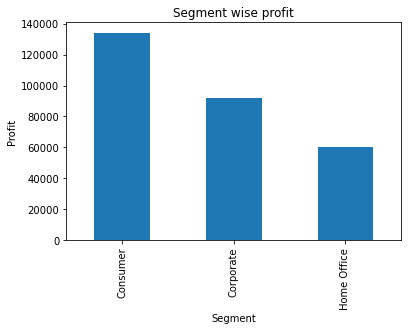

In [118]:
# Plot of segment wise profit
df.groupby('Segment').sum().Profit.plot(kind='bar')
plt.ylabel('Profit')
plt.title('Segment wise profit')

In [119]:
df.groupby(['Category']).sum()

,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,
Furniture,118196026,741999.7953,8028,368.89,18451.2728
Office Supplies,330772872,719047.0320,22906,947.80,122490.8008
Technology,102603754,836154.0330,6939,244.40,145454.9481


Text(0.5, 1.0, 'Category wise profit')

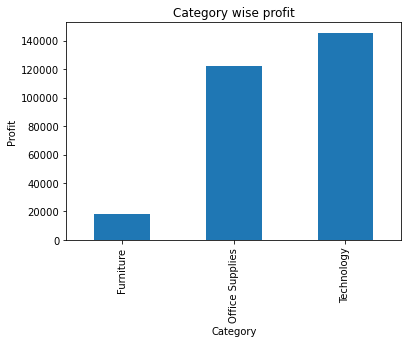

In [120]:
# Plot of Category vs Profit
df.groupby(['Category']).sum().Profit.plot(kind='bar')
plt.ylabel('Profit')
plt.title('Category wise profit')

Furniture segment's profitability can be improved

In [124]:
df.groupby('Sub-Category').sum()

,Postal Code,Sales,Quantity,Discount,Profit
Sub-Category,,,,,
Accessories,44468434,167380.3180,2976,60.80,41936.6357
Appliances,25250538,107532.1610,1729,77.60,18138.0054
Art,43329658,27118.7920,3000,59.60,6527.7870
Binders,83626398,203412.7330,5974,567.00,30221.7633
Bookcases,12771539,114879.9963,868,48.14,-3472.5560
Chairs,34936229,328449.1030,2356,105.00,26590.1663
Copiers,3873477,149528.0300,234,11.00,55617.8249
Envelopes,13325731,16476.4020,906,20.40,6964.1767
Fasteners,12506063,3024.2800,914,17.80,949.5182


Text(0.5, 1.0, 'Sub-category wise profit')

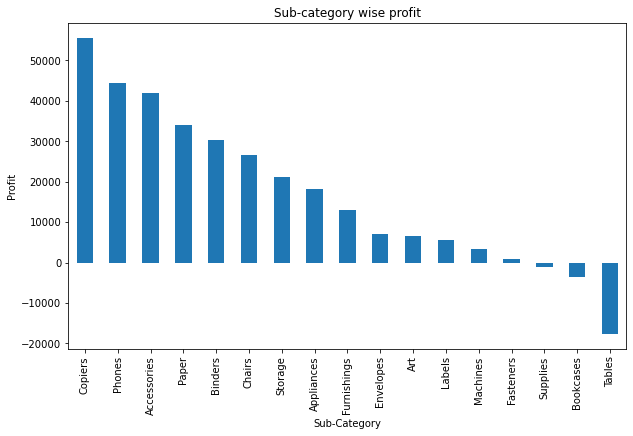

In [125]:
# Sub-category wise profit
plt.figure(figsize=(10,6))
df.groupby('Sub-Category').sum().Profit.sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Profit')
plt.title('Sub-category wise profit')

Loss making subcategories: Tables, Bookcases, Supplies

Marginal profit making subcategory: Fasteners

These sub-categories are weak areas which needs additional focus

Highest profit making sub-categories: Copiers, Phones & Accessories

In [69]:
df.groupby(['Sub-Category','Segment']).sum()

Postal Code        Sales  Quantity  Discount  \
Sub-Category Segment                                                     
Accessories  Consumer        23423012   87105.2380      1578     35.00   
             Corporate       13699948   48190.5640       881     15.00   
             Home Office      7345474   32084.5160       517     10.80   
Appliances   Consumer        13054741   52819.5810       908     44.20   
             Corporate        8231251   36588.6830       569     24.70   
             Home Office      3964546   18123.8970       252      8.70   
Art          Consumer        23698696   14251.9300      1625     33.80   
             Corporate       11014603    8590.4480       850     15.60   
             Home Office      8616359    4276.4140       525     10.20   
Binders      Consumer        42709303  118161.0090      3015    294.40   
             Corporate       25911708   51560.3130      1848    175.00   
             Home Office     15005387   33691.4110      1111     97.60   
Bookcases    Consumer         7413225   68632.7290       496     29.01   
             Corporate        3576136   34005.9243       271     14.00   
             Home Office      1782178   12241.3430       101      5.13   
Chairs       Consumer        18098256  172862.7420      1234     56.20   
             Corporate       11027726   99140.8780       719     31.50   
             Home Office      5810247   56445.4830       403     17.30   
Copiers      Consumer         2040928   69819.0700       117      6.80   
             Corporate        1184078   46829.3860        70      3.00   
             Home Office       648471   32879.5740        47      1.20   
Envelopes    Consumer         6727810    7771.1460       442     11.20   
             Corporate        4342996    5942.6700       323      5.80   
             Home Office      2254925    2762.5860       141      3.40   
Fasteners    Consumer         6837103    1680.9420       473      7.60   
             Corporate        3046925     783.2900       273      7.20   
             Home Office      2622035     560.0480       168      3.00   
Furnishings  Consumer        27874636   49620.0460      1834     69.20   
             Corporate       14222935   25001.2660      1086     39.40   
             Home Office      9782859   17083.8520       643     23.80   
Labels       Consumer         9916769    6709.2620       715     10.60   
             Corporate        5762182    4101.6460       398      8.40   
             Home Office      3874034    1675.4040       287      6.00   
Machines     Consumer         3166340   79542.8250       217     16.80   
             Corporate        1951214   60276.7550       141     12.10   
             Home Office      1247114   49419.0510        82      6.30   
Paper        Consumer        38844283   36324.3680      2602     51.00   
             Corporate       23120568   23883.1300      1555     32.40   
             Home Office     14334370   18271.7080      1021     19.20   
Phones       Consumer        24241749  169932.7640      1685     69.20   
             Corporate       14553958   91153.4140      1003     43.00   
             Home Office      9101468   68920.8760       601     25.20   
Storage      Consumer        25864944  100492.4020      1619     34.60   
             Corporate       13338502   79790.9980      1000     19.40   
             Home Office      7045274   43560.2080       539      9.20   
Supplies     Consumer         5371200   25741.4960       359      9.00   
             Corporate        3631876   19435.2840       202      3.80   
             Home Office      1630482    1496.7580        86      1.80   
Tables       Consumer         9595614   99933.7950       602     42.30   
             Corporate        5919724   70871.7175       419     27.55   
             Home Office      3092490   36160.0195       220     13.50   

                              Profit  
Sub-Category Segment                  
Accessories  Consumer    

Text(0.5, 1.0, 'Segment + Subcategory wise Profit')

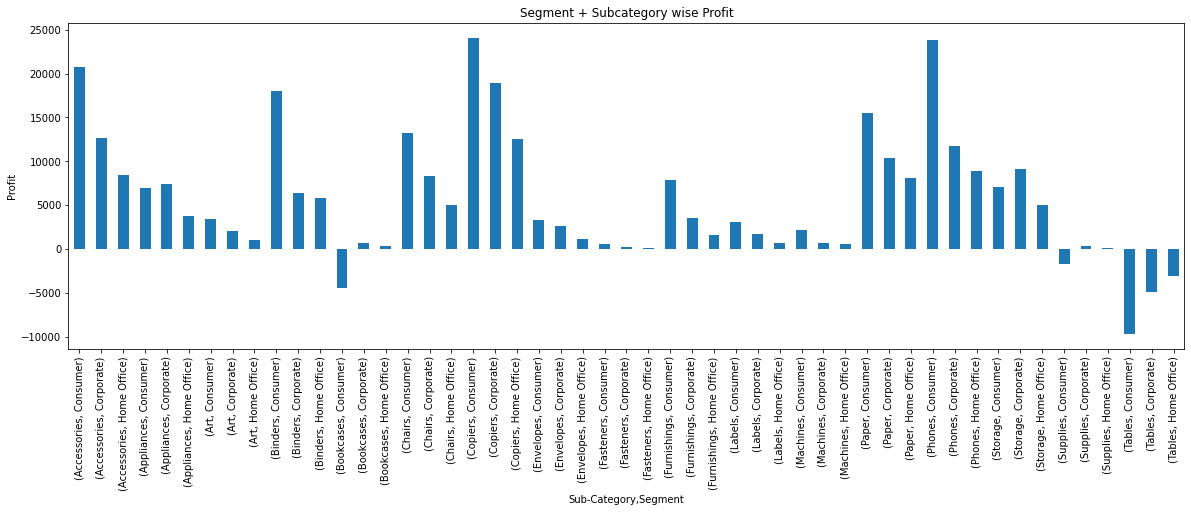

In [97]:
# Plot of Segment wise + Sub category wise profit

plt.figure(figsize=(20,6))
df.groupby(['Sub-Category','Segment']).sum().Profit.plot(kind='bar')
plt.ylabel('Profit')
plt.title('Segment + Subcategory wise Profit')

Loss making sub-category & segment: Bookcases-Consumer, Supplies-Consumer, Tables-All

In [79]:
df.groupby(['Category','Sub-Category']).sum()

Postal Code        Sales  Quantity  Discount  \
Category        Sub-Category                                                 
Furniture       Bookcases        12771539  114879.9963       868     48.14   
                Chairs           34936229  328449.1030      2356    105.00   
                Furnishings      51880430   91705.1640      3563    132.40   
                Tables           18607828  206965.5320      1241     83.35   
Office Supplies Appliances       25250538  107532.1610      1729     77.60   
                Art              43329658   27118.7920      3000     59.60   
                Binders          83626398  203412.7330      5974    567.00   
                Envelopes        13325731   16476.4020       906     20.40   
                Fasteners        12506063    3024.2800       914     17.80   
                Labels           19552985   12486.3120      1400     25.00   
                Paper            76299221   78479.2060      5178    102.60   
                Storage          46248720  223843.6080      3158     63.20   
                Supplies         10633558   46673.5380       647     14.60   
Technology      Accessories      44468434  167380.3180      2976     60.80   
                Copiers           3873477  149528.0300       234     11.00   
                Machines          6364668  189238.6310       440     35.20   
                Phones           47897175  330007.0540      3289    137.40   

                                  Profit  
Category        Sub-Category              
Furniture       Bookcases     -3472.5560  
                Chairs        26590.1663  
                Furnishings   13059.1436  
                Tables       -17725.4811  
Office Supplies Appliances    18138.0054  
                Art            6527.7870  
                Binders       30221.7633  
                Envelopes      6964.1767  
                Fasteners       949.5182  
                Labels         5546.2540  
                Paper         34053.5693  
                Storage       21278.8264  
                Supplies      -1189.0995  
Technology      Accessories   41936.6357  
                Copiers       55617.8249  
                Machines       3384.7569  
                Phones        44515.7306

In [18]:
loss = df.loc[df.Profit<0]
loss.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522


In [20]:
# Region wise loss
loss.groupby('Region').sum()

,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,
Central,52868399,141282.6588,2803,407.14,-56314.8850
East,15129951,160864.0120,1988,247.10,-49590.6075
South,8511782,91635.1850,1004,127.35,-27504.8323
West,28249259,74925.2990,1245,118.15,-22720.9609


Text(0.5, 1.0, 'Region wise loss')

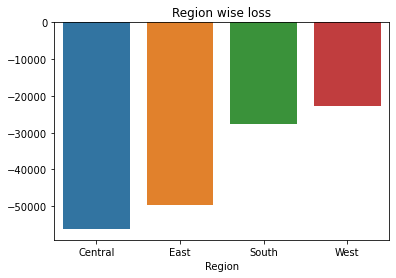

In [28]:
sns.barplot(x=loss.groupby('Region').sum().Profit.index,y=loss.groupby('Region').sum().Profit.values)
plt.title('Region wise loss')

The Central region accounts for the highest loss followed by East, South & West

In [22]:
profit = df.loc[df.Profit>0]
profit.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.860,7,0.0,14.1694


In [25]:
profit.groupby('Region').sum()

,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,
Central,98179442,355822.9170,5932,148.90,96021.2475
East,34731228,509215.9260,8550,164.50,141113.3875
South,46946712,294021.3920,5146,109.80,74254.2626
West,263461931,641746.6235,10950,229.85,131139.4098


Text(0.5, 1.0, 'Region wise profit')

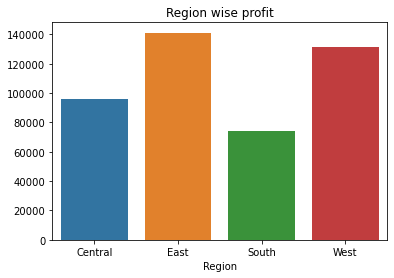

In [27]:
sns.barplot(x=profit.groupby('Region').sum().Profit.index,y=profit.groupby('Region').sum().Profit.values)
plt.title('Region wise profit')

The Eastern region contributed more for the profit followed by West, Central & South

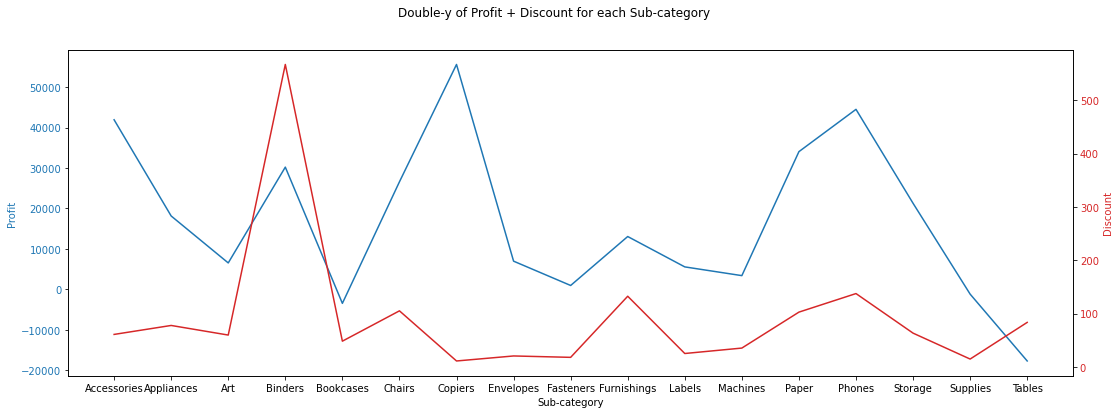

In [110]:
# Double-y plot of Sub-category wise Profit & Discount to find for correlation

fig,ax1 = plt.subplots(figsize=(18,6))
fig.suptitle('Double-y of Profit + Discount for each Sub-category')

color = 'tab:blue'
ax1.set_xlabel('Sub-category')
ax1.set_ylabel('Profit',color=color)
ax1.plot(df.groupby('Sub-Category').sum().Profit.index,df.groupby('Sub-Category').sum().Profit.values,color=color)
ax1.tick_params(axis='y',labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Discount',color=color)
ax2.plot(df.groupby('Sub-Category').sum().Discount.index,df.groupby('Sub-Category').sum().Discount.values,color=color)
ax2.tick_params(axis='y',labelcolor=color)

No clear trend could be observed between Profit of a Sub-category and discount offered on it.

Text(0.5, 1.0, 'Sub-category wise Quantity sold')

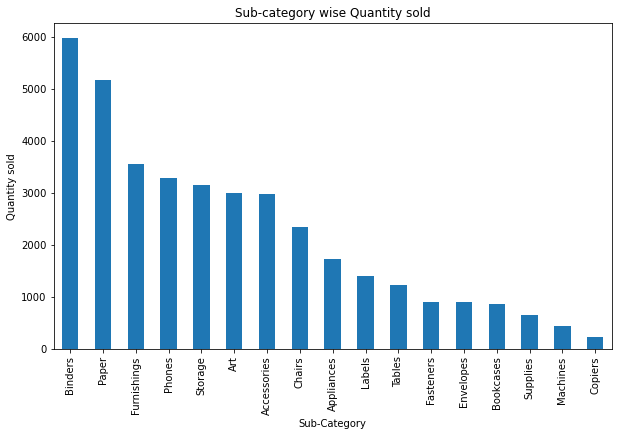

In [62]:
# Plot of sub-category wise quantity sold
plt.figure(figsize=(10,6))
df.groupby('Sub-Category').sum().Quantity.sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Quantity sold')
plt.title('Sub-category wise Quantity sold')

In [126]:
df.groupby('Ship Mode').sum()

,Postal Code,Sales,Quantity,Discount,Profit
Ship Mode,,,,,
First Class,84229511,3.514284e+05,5693,253.17,48969.8399
Same Day,31242093,1.283631e+05,1960,82.75,15891.7589
Second Class,108192588,4.591936e+05,7423,270.15,57446.6354
Standard Class,327908460,1.358216e+06,22797,955.02,164088.7875


Text(0.5, 1.0, 'Ship mode vs Sales')

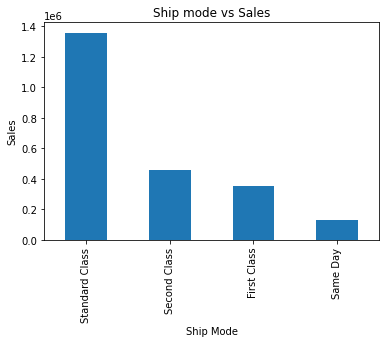

In [130]:
# Plotting Ship mode vs Sales
df.groupby('Ship Mode').sum().Sales.sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Sales')
plt.title('Ship mode vs Sales')

Most of the products are despatched through Standard class